# Example 5.7 — POD model development

**Author:** Justin Ryan  
**Created:** 2025-09-24  
**Updated:** 2025-11-04  
**Version:** 1.1  

---
## Problem Statement

Consider an inspection system that was designed to detect flaws of various sizes that are actually hidden from
view. One-hundred nineteen such detections were attempted where the detection instrument read (or didn’t
read) the measured flaw as presented in Table 5.16 with the flaw’s actual size given in the adjoining columns
and whether the instrument detected the flaw or not (Barrett, Smith and Modarres, 2018).
Approximate the **MLE estimate** for the detection data assuming a **logistic POD** assuming that the **smallest
detectable flaw size is 0.254 mm.**

---

## Solution:

### Probability of Detection (POD) Model: Logistic

Plain log–logistic POD: $POD_{\text{plain}}(x) = \mathrm{expit}\big(\beta_0 + \beta_1 \ln x\big)$.

Left–truncated at $a_{lth}$: $POD(x) = 0,\ x < a_{lth};\quad POD(x) = \dfrac{POD_{\text{plain}}(x) - POD_{\text{plain}}(a_{lth})}{1 - POD_{\text{plain}}(a_{lth})},\ x \ge a_{lth}$.

### LSQ estimates

| Parameter | Estimate |
|-----------|----------|
| $\beta_0$ | 1.0359 |
| $\beta_1$ | 1.2978 |

### MLE estimates

| Parameter | Estimate | Std. Error | 95% CI low | 95% CI high |
|-----------|----------|------------|----------------|-----------------|
| $\beta_0$ | 0.9829 | 0.7127 | -0.4140 | 2.3799 |
| $\beta_1$ | 1.3225 | 0.4602 | 0.4206 | 2.2245 |


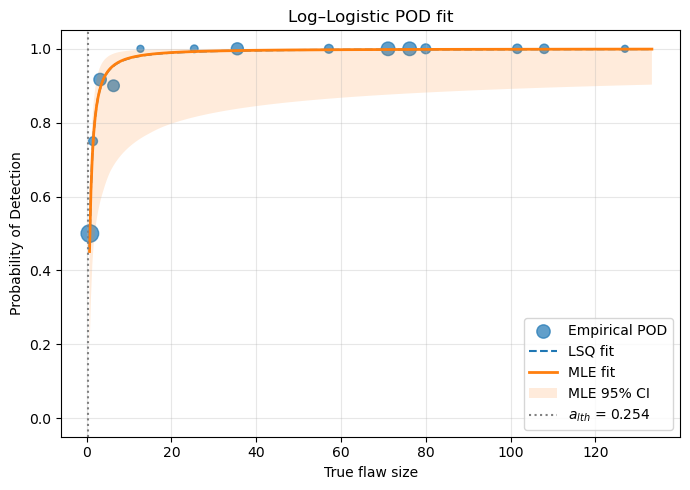

In [3]:
# EXAMPLE 5.7
import sys 
sys.path.append("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/ADT Fitters Module")
from ADT_fitters import Fit_Logistic_POD
import pandas as pd

# Read Data
df = pd.read_csv("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/Modarres Chapter Validation/Data/Example_5.7_data.csv")

fit_bayes = Fit_Logistic_POD(
    D_measured=df["Measured"],
    D_true=df["Actual"],
    a_lth=0.254,
    # a_lth=None,
    method="MLE",
    CI=0.95,
    random_state=7,
)